In [3]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv(r"C:\Users\User\Downloads\archive (55)\car_prices.csv")
df

,year,make,model,trim,body,transmission,vin Vehicle Identification Number,state,condition,odometer,color,interior,seller,mmr Manheim Market Report (MMR) values,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558732,2012,GMC,Acadia,Denali,suv,automatic,1gkkvtedxcj212933,nv,44.0,38522.0,red,black,unique autos,29900.0,31250.0,Fri Jun 19 2015 04:55:00 GMT-0700 (PDT)
558733,2012,Ford,Transit Connect,Cargo Van XLT,minivan,automatic,nm0ls6bnxct089062,pa,42.0,114260.0,white,black,usautoland inc,8875.0,8500.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558734,2012,Toyota,Tundra,Tundra,double cab,automatic,5tfuy5f19cx221289,nv,37.0,79472.0,red,gray,unique autos,21300.0,21300.0,Fri Jun 19 2015 04:55:00 GMT-0700 (PDT)
558735,2011,BMW,3 Series,328i,convertible,automatic,wbadw7c54be544102,nv,35.0,41594.0,silver,beige,findlay kia,21500.0,22250.0,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)


In [5]:
df.isnull().sum()

year                                          0
make                                      10299
model                                     10397
trim                                      10649
body                                      13193
transmission                              65340
vin Vehicle Identification Number             4
state                                         0
condition                                 11820
odometer                                     94
color                                       749
interior                                    749
seller                                        0
mmr Manheim Market Report (MMR) values       38
sellingprice                                 12
saledate                                     12
dtype: int64

In [6]:
df.drop(['vin Vehicle Identification Number','seller','mmr Manheim Market Report (MMR) values',
         'state','saledate','trim'],axis=1,inplace=True)

In [7]:
df

,year,make,model,body,transmission,condition,odometer,color,interior,sellingprice
0,2015,Kia,Sorento,SUV,automatic,5.0,16639.0,white,black,21500.0
1,2015,Kia,Sorento,SUV,automatic,5.0,9393.0,white,beige,21500.0
2,2014,BMW,3 Series,Sedan,automatic,45.0,1331.0,gray,black,30000.0
3,2015,Volvo,S60,Sedan,automatic,41.0,14282.0,white,black,27750.0
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,43.0,2641.0,gray,black,67000.0
...,...,...,...,...,...,...,...,...,...,...
558732,2012,GMC,Acadia,suv,automatic,44.0,38522.0,red,black,31250.0
558733,2012,Ford,Transit Connect,minivan,automatic,42.0,114260.0,white,black,8500.0
558734,2012,Toyota,Tundra,double cab,automatic,37.0,79472.0,red,gray,21300.0
558735,2011,BMW,3 Series,convertible,automatic,35.0,41594.0,silver,beige,22250.0


In [8]:
df['color'] = df['color'].fillna('Unknown')

In [9]:
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

In [10]:
df['condition'] = df['condition'].fillna(df['condition'].median())

In [11]:
df['interior'] = df['interior'].fillna('Unknown')

In [12]:
df = df.dropna(subset=['sellingprice'])

In [13]:
for col in ['make', 'model', 'body', 'transmission']:
    df[col] = df[col].fillna(df[col].mode()[0])


In [14]:
df.isnull().sum()

year            0
make            0
model           0
body            0
transmission    0
condition       0
odometer        0
color           0
interior        0
sellingprice    0
dtype: int64

In [15]:
L1=LabelEncoder()
L2=LabelEncoder()
L3=LabelEncoder()
L4=LabelEncoder()
L5=LabelEncoder()
L6=LabelEncoder()

In [16]:
df['model'].value_counts()

model
Altima        29742
F-150         14478
Fusion        12945
Camry         12545
Escape        11859
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: count, Length: 973, dtype: int64

In [17]:
df['model'] = L1.fit_transform(df['model'])

In [18]:
df['body'] = L2.fit_transform(df['body'])

In [19]:
df['make'] = L3.fit_transform(df['make'])

In [20]:
df['transmission'] = L4.fit_transform(df['transmission'])

In [21]:
df['color'] = L5.fit_transform(df['color'])

In [22]:
df['interior'] = L6.fit_transform(df['interior'])

## df

## Heat Map

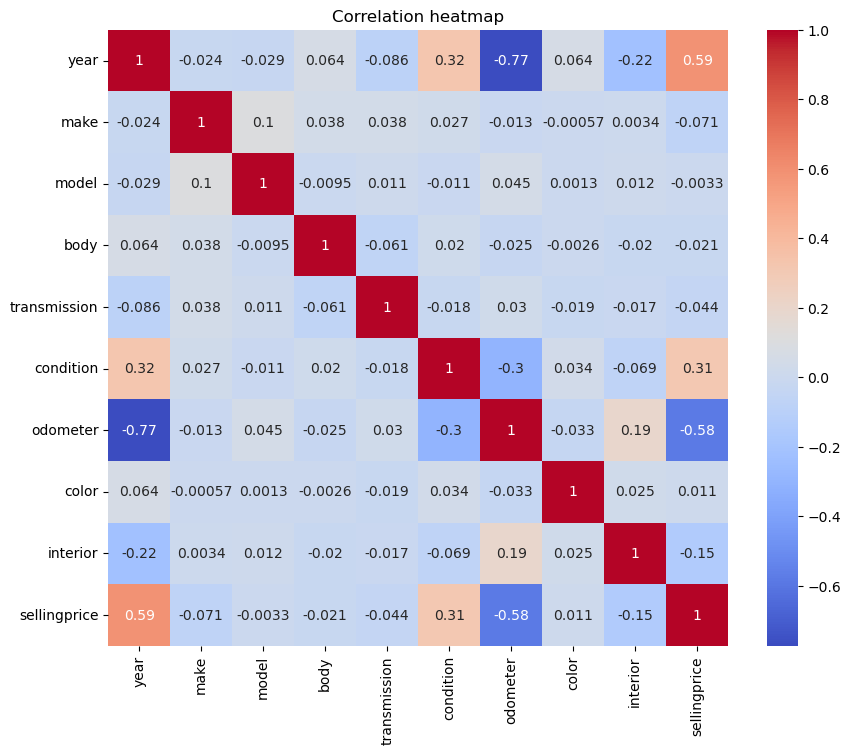

In [25]:
plt.figure(figsize=(10, 8))  
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

<Axes: >

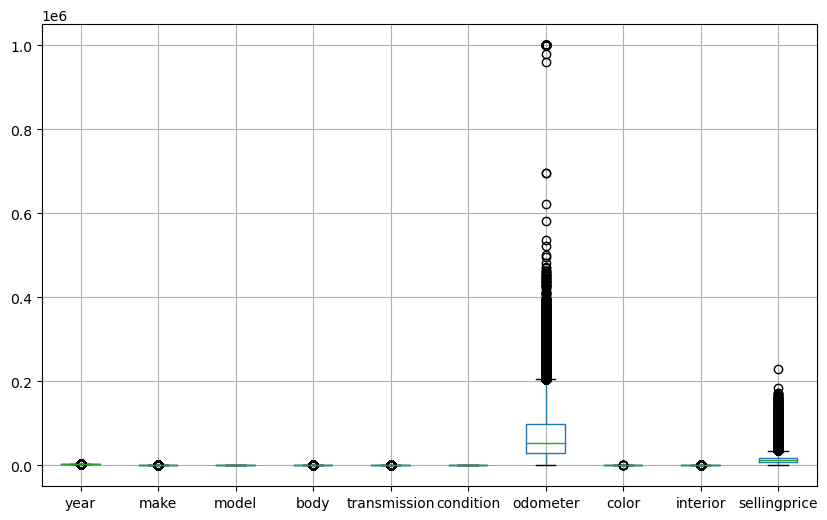

In [26]:
plt.figure(figsize=(10, 6))
df.boxplot()

In [27]:
q1=df["odometer"].quantile(0.25)
q3=df["odometer"].quantile(0.75)
iqr=q3-q1

lower=q1 -(1.5* iqr)
upper=q3 +(1.5 * iqr)
df["odometer"] = df["odometer"].clip(lower,upper)

In [28]:
q1=df["sellingprice"].quantile(0.25)
q3=df["sellingprice"].quantile(0.75)
iqr=q3-q1

lower=q1 -(1.5* iqr)
upper=q3 +(1.5 * iqr)
df["sellingprice"] = df["sellingprice"].clip(lower,upper)

In [29]:
x=df.drop('sellingprice',axis=1)

In [30]:
x

,year,make,model,body,transmission,condition,odometer,color,interior
0,2015,24,658,36,1,5.0,16639.0,44,2
1,2015,24,658,36,1,5.0,9393.0,44,1
2,2014,3,9,37,1,45.0,1331.0,34,2
3,2015,51,596,37,1,41.0,14282.0,44,2
4,2014,3,44,37,1,43.0,2641.0,34,2
...,...,...,...,...,...,...,...,...,...
558732,2012,15,65,81,1,44.0,38522.0,41,2
558733,2012,14,702,71,1,42.0,114260.0,44,2
558734,2012,49,712,56,1,37.0,79472.0,41,7
558735,2011,3,9,49,1,35.0,41594.0,42,1


In [31]:
y=df[['sellingprice']]

In [32]:
y

,sellingprice
0,21500.0
1,21500.0
2,30000.0
3,27750.0
4,35150.0
...,...
558732,31250.0
558733,8500.0
558734,21300.0
558735,22250.0


In [33]:
x=StandardScaler().fit_transform(x)
y=StandardScaler().fit_transform(y)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
q1=df["Price"].quantile(0.25)
q3=df["Price"].quantile(0.75)
iqr=q3-q1

lower=q1 -(1.5* iqr)
upper=q3 +(1.5 * iqr)
df["Price"] = df["Price"].clip(lower,upper)

In [35]:
model=LinearRegression() # creating object 
model.fit(x_train,y_train) 

LinearRegression()

In [36]:
test_pred=model.predict(x_train)
test_pred

array([[-0.88537387],
       [ 0.32484091],
       [ 0.40334552],
       ...,
       [ 0.31766418],
       [ 0.91296263],
       [ 0.36658781]])

In [37]:
train_pred=model.predict(x_test)
train_pred

array([[-0.39087642],
       [-1.01861871],
       [-0.08088567],
       ...,
       [-0.04035932],
       [-0.56167352],
       [-0.96121796]])

In [38]:
#r2_score(train_pred,y_test)

In [ ]:
model1=SVR(kernel='linear')
model1.fit(x_train,y_train)

In [ ]:
test_pred1=model1.predict(x_test)
test_pred1

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)


In [ ]:
test_pred=model.predict(x_train)
test_pred